In [1]:
import pandas as pd

imp = pd.read_csv("section5-ab_test_imp.csv", parse_dates=['log_date'])
imp.head(5)

,log_date,app_name,test_name,test_case,user_id,transaction_id
0,2013-10-01,game-01,sales_test,B,36703,25622
1,2013-10-01,game-01,sales_test,A,44339,25623
2,2013-10-01,game-01,sales_test,B,32087,25624
3,2013-10-01,game-01,sales_test,B,10160,25625
4,2013-10-01,game-01,sales_test,B,46113,25626


In [2]:
goal = pd.read_csv("section5-ab_test_goal.csv", parse_dates=['log_date'])
goal.head(5)

,log_date,app_name,test_name,test_case,user_id,transaction_id
0,2013-10-01,game-01,sales_test,B,15021,25638
1,2013-10-01,game-01,sales_test,B,351,25704
2,2013-10-01,game-01,sales_test,B,8276,25739
3,2013-10-01,game-01,sales_test,B,1230,25742
4,2013-10-01,game-01,sales_test,B,17471,25743


In [12]:
imp['click'] = pd.merge(imp, goal, how='left', on=['transaction_id'])['log_date_y'].apply(lambda x: pd.notnull(x))
imp.head(5)

,log_date,app_name,test_name,test_case,user_id,transaction_id,click
0,2013-10-01,game-01,sales_test,B,36703,25622,False
1,2013-10-01,game-01,sales_test,A,44339,25623,False
2,2013-10-01,game-01,sales_test,B,32087,25624,False
3,2013-10-01,game-01,sales_test,B,10160,25625,False
4,2013-10-01,game-01,sales_test,B,46113,25626,False


In [53]:
total = imp.groupby(['test_case'])['transaction_id'].count()
total

test_case
A    44134
B    43790
Name: transaction_id, dtype: int64

In [48]:
click = imp[imp['click']].groupby(['test_case'])['transaction_id'].count()
click

test_case
A    3542
B    5056
Name: transaction_id, dtype: int64

In [49]:
# CTR
click / total

test_case
A    0.080256
B    0.115460
Name: transaction_id, dtype: float64

In [154]:
from scipy import stats
ab = np.array([click.as_matrix(), (total - click).as_matrix()])
squared,p,dof,ef = stats.chi2_contingency(ab.T)

print("検定統計量: " + str(squared))
print("p値: " + str(p))
print("自由度: " + str(dof))
print("期待度数: " + str(ef))

検定統計量: 308.375052893
p値: 4.93413963379e-69
自由度: 1
期待度数: [[  4315.81970793  39818.18029207]
 [  4282.18029207  39507.81970793]]


In [156]:
# 日別クリック数
total_per_day = pd.pivot_table(imp, index=['log_date'], columns=['test_case'],  values='transaction_id',aggfunc=lambda x : len(x))
total_per_day.head(5)

test_case,A,B
log_date,,
2013-10-01,1358,1391
2013-10-02,1370,1333
2013-10-03,1213,1233
2013-10-04,1521,1462
2013-10-05,1587,1554


In [155]:
# 日別表示回数
pd.pivot_table(imp[imp['click']], index=['log_date'], columns=['test_case'],  values='transaction_id',aggfunc=lambda x : len(x))
click_per_day.head(5)

test_case,A,B
log_date,,
2013-10-01,98,176
2013-10-02,88,212
2013-10-03,170,185
2013-10-04,89,174
2013-10-05,56,102


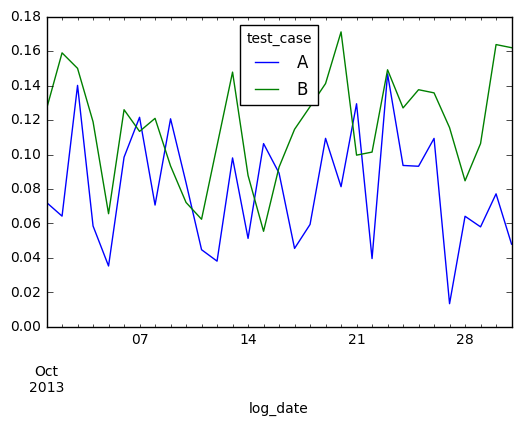

In [157]:
# バナー広告 A/B ごとのクリック率時系列推移
click_rate_per_day = click_per_day / total_per_day
click_rate_per_day.plot()